In [16]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from solutions_biv import categorical_solution_1

We'll continue to make use of the fuel economy dataset in this workspace.

In [2]:
fuel_econ = pd.read_csv('./Data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


-------

**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [3]:
# YOUR CODE HERE
fuel_econ['fuelType'].value_counts()

Premium Gasoline     2302
Regular Gasoline     1521
Diesel                 80
Midgrade Gasoline      23
Natural Gas             3
Name: fuelType, dtype: int64

In [8]:
# get only 2 main fuel type data
df = fuel_econ[(fuel_econ['fuelType'] == 'Premium Gasoline') | (fuel_econ['fuelType'] == 'Regular Gasoline')]

In [9]:
df['fuelType'].value_counts()

Premium Gasoline    2302
Regular Gasoline    1521
Name: fuelType, dtype: int64

--

In [11]:
df['VClass'].value_counts()

Midsize Cars        1149
Compact Cars        1083
Subcompact Cars      666
Large Cars           604
Minicompact Cars     321
Name: VClass, dtype: int64

In [13]:
# sort the VClass columns
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars','Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(categories=sedan_classes, ordered=True)
df['VClass'] = df['VClass'].astype(vclasses);

<ipython-input-13-3bb2e86f42ab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VClass'] = df['VClass'].astype(vclasses);


In [14]:
df['VClass']

0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3823, dtype: category
Categories (5, object): ['Minicompact Cars' < 'Subcompact Cars' < 'Compact Cars' < 'Midsize Cars' < 'Large Cars']

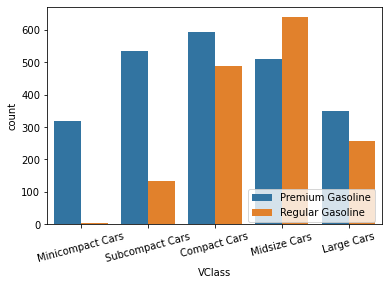

In [31]:
sns.countplot(data=df, x='VClass', hue='fuelType');
plt.legend(loc=(0.6, 0.01))
plt.xticks(rotation=15);

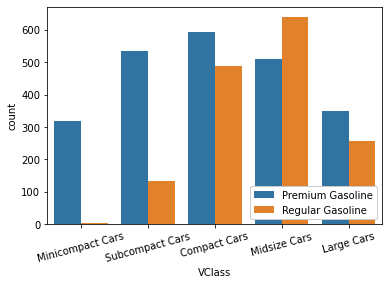

In [35]:
# option 2) using axis
ax = sns.countplot(data=df, x='VClass', hue='fuelType');
ax.legend(loc=4, framealpha=1)
plt.xticks(rotation=15);

-----

I chose a clustered bar chart instead of a heat map in this case since there weren't a lot of numbers to plot. If you chose a heat map, did you remember to add a color bar and include annotations? From this plot, you can see that more cars use premium gas over regular gas, and that the smaller cars are biased towards the premium gas grade. It is only in midsize sedans where regular gasoline was used in more cars than premium gasoline.


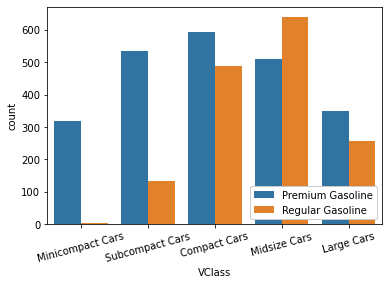

In [4]:
# run this cell to check your work against ours
categorical_solution_1()